This is my story telling module for the data for my capstone project 1.  To begin with, I will define the names of the columns for those who are not hockey fans.  All the columns, except the last, are labelled beginning with H or A, to refer to the home and away team.  The columns are all statistics to measure a team's performance in a hockey game and in this dataset, are cumulative since the beginning of the 2013 season.  The last column, "Home Win", is simply a 1 if the home team won or a 0 if the home team lost, and will eventually be used to tune the hyperparameters of a logistic regression model.  "Fenwick Close" measure a team's shot percentage when the difference in score is 1 or less; "GF" is how many goals a team has scored; "GA" is how many goals have been scored against a team; "GlDiff" is the difference between "GF" and "GA", thus a positive number there means a team has scored more goals than have been scored against them; "PP%" is the percent of the time a team with an extra skater (due to a penalty by the other team) has scored; "PK%" is the percent of the time a team short a skater (due to a penalty by that team) prevents the other team from scoring; "sh%" is the percent of a team's shots that score, and in this dataset, the value divided by 10000 yields the actual percent; "sv%" is the percent of shots that a team's goaltenders have stopped, and in this dataset, the value divided by 1000 yields the actual percent; "PDO" is a combination of "sh%" and "sv%" and is generally referred to as a team's luck; "win streak" is how many games in a row a team has won, if positive, or lost, if negative; "standing" is a team's rank, or standing, for the purpose of getting into the playoffs, with a lower number being a better standing, i.e. 1 is the number 1 ranked team; "5-5 F/A" is the ratio of goals scored for a team to goals scored against a team when both teams have the full 5 skaters each.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data.csv')

In [2]:
# I'll define some categories to create some plots from

FC = ['H Fenwick Close','A Fenwick Close']
GF = ['H GF','A GF']
GA = ['H GA','A GA']
GD = ['H GlDiff','A GlDiff']
PP = ['H PP%','A PP%']
PK = ['H PK%','A PK%']
SH = ['H sh%','A sh%']
SV = ['H sv%','A sv%']
PDO = ['H PDO','A PDO']
WS = ['H win streak','A win streak']
ST = ['H standing','A standing']
FA = ['H 5-5 F/A','A 5-5 F/A']
Home = ['H Fenwick Close','H GF','H GA','H GlDiff','H PP%','H PK%','H sh%','H sv%','H PDO','H win streak','H standing','H 5-5 F/A']
Away = ['A Fenwick Close','A GF','A GA','A GlDiff','A PP%','A PK%','A sh%','A sv%','A PDO','A win streak','A standing','A 5-5 F/A']

In [3]:
df_home = df.drop(Away, axis=1)
df_away = df.drop(Home, axis=1)
df_home.describe()

,H Fenwick Close,H GF,H GA,H GlDiff,H PP%,H PK%,H sh%,H sv%,H PDO,H win streak,H standing,H 5-5 F/A,Home Win
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,50.096074,83.640232,83.406190,0.234043,18.376209,81.646809,915.615087,915.916828,1000.301741,0.462282,8.052224,1.032012,0.586074
std,3.736658,28.415354,29.053636,16.634738,4.099238,4.211227,13.063975,13.503188,19.207603,2.638605,4.391586,0.234541,0.493013
min,41.270000,28.000000,26.000000,-58.000000,10.400000,67.400000,871.000000,873.000000,958.000000,-7.000000,1.000000,0.520000,0.000000
25%,47.190000,59.000000,60.000000,-11.000000,15.100000,78.700000,909.000000,907.000000,988.000000,-1.000000,4.000000,0.870000,0.000000
50%,50.250000,84.000000,83.000000,-1.000000,17.900000,81.500000,917.000000,919.000000,1000.000000,1.000000,8.000000,1.010000,1.000000
75%,52.980000,106.000000,105.000000,10.000000,21.000000,84.200000,924.000000,925.000000,1012.000000,2.000000,12.000000,1.170000,1.000000
max,60.330000,157.000000,164.000000,53.000000,34.600000,95.100000,952.000000,947.000000,1061.000000,15.000000,15.000000,1.750000,1.000000


In [4]:
df_away.describe()

,A Fenwick Close,A GF,A GA,A GlDiff,A PP%,A PK%,A sh%,A sv%,A PDO,A win streak,A standing,A 5-5 F/A,Home Win
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,50.069710,83.056093,83.247582,-0.191489,18.399226,81.447389,916.558994,916.272727,999.713733,0.193424,8.135397,1.024662,0.586074
std,3.785568,28.877896,29.637745,16.070463,4.796999,4.912444,13.034648,13.849310,18.587298,2.294524,4.294968,0.225060,0.493013
min,40.190000,27.000000,27.000000,-61.000000,10.300000,28.300000,870.000000,880.000000,960.000000,-7.000000,1.000000,0.520000,0.000000
25%,47.090000,59.000000,59.000000,-10.000000,15.200000,79.000000,910.000000,907.000000,986.000000,-1.000000,4.000000,0.870000,0.000000
50%,50.490000,84.000000,83.000000,0.000000,17.900000,81.400000,917.000000,919.000000,1001.000000,-1.000000,8.000000,1.000000,1.000000
75%,53.030000,105.000000,106.000000,9.000000,20.800000,83.900000,925.000000,926.000000,1012.000000,2.000000,12.000000,1.170000,1.000000
max,59.860000,155.000000,168.000000,55.000000,79.400000,94.800000,953.000000,950.000000,1063.000000,11.000000,15.000000,1.830000,1.000000


There are some interesting finds in those 2 summaries.  Looking at the means, most of them are very close between home and away teams.  2 that stick out are GlDiff and win streak.  The mean goal difference is positive for home teams and negative for away teams, so home teams tend to score more than they are scored on.  The mean win streak is more than double for home teams than away teams, so teams tend to win consecutively more at home than away.  Also, the mean home win shows that almost 60% of games were won by the home team.  From the away team summary, it appears there is possibly some bad data in PP% and PK%.  A max PP% of 79 is too high and a min PK% of 28 is too low.  If this dataset included every game from the season, those 2 numbers would be not so unusual, but starting from partway into the season, they look a little suspicious.

I'm going to do a quick grid of violinplots.  Violinplots show data as a symmetric shape.  The widest parts of the plot are where the majority of the data points are, and the max and min are easy to see.  In the middle of each plot is a black bar showing the 25th percentile at the bottom, the 75th percentile at the top, and the median at the white dot in the bar.

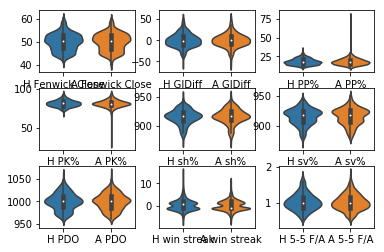

In [5]:
plt.subplots_adjust(hspace=0.25,wspace=0.25)
plt.subplot(3,3,1)
sns.violinplot(data=df[FC],orient='v')
plt.subplot(3,3,2)
sns.violinplot(data=df[GD],orient='v')
plt.subplot(3,3,3)
sns.violinplot(data=df[PP],orient='v')
plt.subplot(3,3,4)
sns.violinplot(data=df[PK],orient='v')
plt.subplot(3,3,5)
sns.violinplot(data=df[SH],orient='v')
plt.subplot(3,3,6)
sns.violinplot(data=df[SV],orient='v')
plt.subplot(3,3,7)
sns.violinplot(data=df[PDO],orient='v')
plt.subplot(3,3,8)
sns.violinplot(data=df[WS],orient='v')
plt.subplot(3,3,9)
sns.violinplot(data=df[FA],orient='v')
plt.rcParams['figure.figsize'] = (14,8)
plt.show()

The spike at the top of the away PP% and the bottom of the PK% show visually what the summaries showed earlier, and need to be examined and possibly corrected.  I'll look at those and plot these again if anything needs to change.

In [6]:
print(df_away[df_away['A PK%'] < 50])

                                    Game  A Fenwick Close  A GF  A GA  \
129  2013-03-05 St. Louis at Los Angeles            55.38    60    61   

     A GlDiff  A PP%  A PK%  A sh%  A sv%  A PDO  A win streak  A standing  \
129        -1   79.4   28.3    928    894    966            -1           7   

     A 5-5 F/A  Home Win  
129       0.82         1  


Looks like there's only 1 game with a very low PK%.  I'll check surrounding games for St. Louis to see if it's an error.

In [7]:
print(df_away[109:144])

                                      Game  A Fenwick Close  A GF  A GA  \
109         2013-03-03 St. Louis at Dallas            55.73    59    57   
110         2013-03-03 Carolina at Florida            51.66    60    57   
111          2013-03-03 Montreal at Boston            52.85    64    50   
112       2013-03-03 Buffalo at NY Rangers            43.94    58    70   
113       2013-03-03 Edmonton at Minnesota            45.92    49    54   
114        2013-03-03 Vancouver at Calgary            53.94    59    54   
115      2013-03-04 New Jersey  at Toronto            51.63    52    56   
116     2013-03-04 Tampa Bay at Pittsburgh            44.24    73    67   
117          2013-03-04 Anaheim at Phoenix            46.81    71    55   
118    2013-03-04 Nashville at Los Angeles            45.66    46    54   
119    2013-03-05 Tampa Bay at New Jersey             44.24    76    71   
120    2013-03-05 Montreal at NY Islanders            52.45    68    53   
121        2013-03-05 Bos

Bingo.  Game 109 shows St. Louis with a PP% of 29.4 and a PK% of 80, and Game 143 shows a PP% of 27.8 and PK% of 81.  Game 129 is the game between those 2 and wouldn't have that extreme a jump in those numbers.  It should have those 2 values switched.

In [8]:
df.at[129,'A PP%'] = 28.3
df.at[129,'A PK%'] = 79.4

In [9]:
print(df[129:130])

                                    Game  H Fenwick Close  H GF  H GA  \
129  2013-03-05 St. Louis at Los Angeles             58.8    54    48   

     H GlDiff  H PP%  H PK%  H sh%  H sv%  H PDO    ...     A GlDiff  A PP%  \
129         6   17.7   82.7    920    913    993    ...           -1   28.3   

     A PK%  A sh%  A sv%  A PDO  A win streak  A standing  A 5-5 F/A  Home Win  
129   79.4    928    894    966            -1           7       0.82         1  

[1 rows x 26 columns]


That's better.  I'll show those plots again.

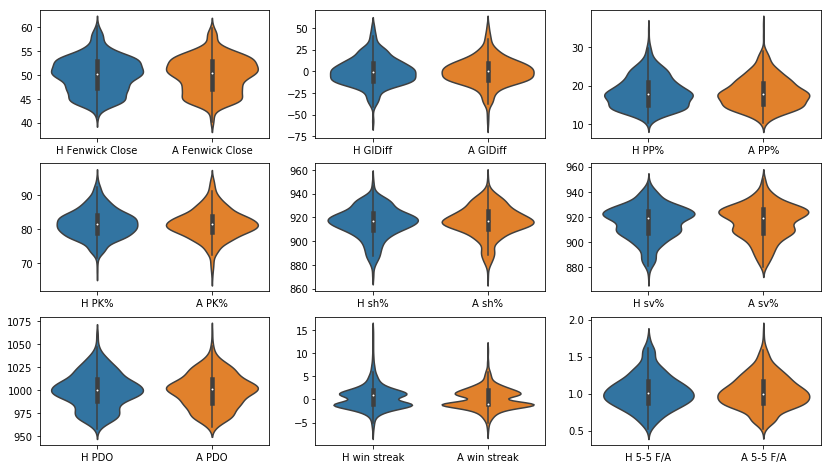

In [10]:
plt.subplot(3,3,1)
sns.violinplot(data=df[FC],orient='v')
plt.subplot(3,3,2)
sns.violinplot(data=df[GD],orient='v')
plt.subplot(3,3,3)
sns.violinplot(data=df[PP],orient='v')
plt.subplot(3,3,4)
sns.violinplot(data=df[PK],orient='v')
plt.subplot(3,3,5)
sns.violinplot(data=df[SH],orient='v')
plt.subplot(3,3,6)
sns.violinplot(data=df[SV],orient='v')
plt.subplot(3,3,7)
sns.violinplot(data=df[PDO],orient='v')
plt.subplot(3,3,8)
sns.violinplot(data=df[WS],orient='v')
plt.subplot(3,3,9)
sns.violinplot(data=df[FA],orient='v')
plt.rcParams['figure.figsize'] = (14,8)
plt.show()

Some things to note.  Most of the plots look very similar.  The most different appear to be PDO and win streak.  The away teams' PDO shows an obvious mean with gradual increase and decrease to the max and min.  The home teams' PDO shows the gradual increase, but a sharp decrease right under the mean, followed by a "plateau", then resuming the gradual decrease.  So, perhaps the home teams have slightly less bad luck.  And, as shown in the earlier summaries, the home teams have a larger mean win streak than the away teams.  In fact, the away teams' mean is very near the 25th percentile, which the plot also shows.  Home teams have a fairly even split between consecutive wins and consecutive losses, but away teams clearly have more consecutive losses.  Also, home teams definitely have the longest win streak.

In the index column, some games with "New Jersey" have an extra space.  I should fix that too.

In [11]:
df['Game']

0              2013-02-16 Tampa Bay at Florida
1                 2013-02-16 Ottawa at Toronto
2          2013-02-16 Philadelphia at Montreal
3       2013-02-16 New Jersey  at NY Islanders
4              2013-02-16 Anaheim at Nashville
5               2013-02-16 Columbus at Phoenix
6              2013-02-16 Colorado at Edmonton
7             2013-02-17 Pittsburgh at Buffalo
8            2013-02-17 Los Angeles at Chicago
9                2013-02-17 Boston at Winnipeg
10                2013-02-17 Calgary at Dallas
11             2013-02-17 Detroit at Minnesota
12         2013-02-17 Washington at NY Rangers
13           2013-02-17 St. Louis at Vancouver
14            2013-02-18 Ottawa at New Jersey 
15     2013-02-18 Philadelphia at NY Islanders
16            2013-02-18 Nashville at Colorado
17             2013-02-18 Carolina at Montreal
18               2013-02-18 Toronto at Florida
19               2013-02-18 Calgary at Phoenix
20              2013-02-18 Columbus at Anaheim
21           

In [12]:
# I've tried many ways to do this the easy way, but can't make it work, so I'll do it the hard way

df.at[3,'Game'] = '2013-02-16 New Jersey at NY Islanders'
df.at[14,'Game'] = '2013-02-18 Ottawa at New Jersey'
df.at[34,'Game'] = '2013-02-21 New Jersey at Washington'
df.at[45,'Game'] = '2013-02-23 New Jersey at Washington'
df.at[58,'Game'] = '2013-02-24 Winnipeg at New Jersey'
df.at[88,'Game'] = '2013-02-28 New Jersey at Winnipeg'
df.at[99,'Game'] = '2013-03-02 New Jersey at Buffalo'
df.at[115,'Game'] = '2013-03-04 New Jersey at Toronto'
df.at[119,'Game'] = '2013-03-05 Tampa Bay at New Jersey'
df.at[135,'Game'] = '2013-03-07 Buffalo at New Jersey'
df['Game']

0              2013-02-16 Tampa Bay at Florida
1                 2013-02-16 Ottawa at Toronto
2          2013-02-16 Philadelphia at Montreal
3        2013-02-16 New Jersey at NY Islanders
4              2013-02-16 Anaheim at Nashville
5               2013-02-16 Columbus at Phoenix
6              2013-02-16 Colorado at Edmonton
7             2013-02-17 Pittsburgh at Buffalo
8            2013-02-17 Los Angeles at Chicago
9                2013-02-17 Boston at Winnipeg
10                2013-02-17 Calgary at Dallas
11             2013-02-17 Detroit at Minnesota
12         2013-02-17 Washington at NY Rangers
13           2013-02-17 St. Louis at Vancouver
14             2013-02-18 Ottawa at New Jersey
15     2013-02-18 Philadelphia at NY Islanders
16            2013-02-18 Nashville at Colorado
17             2013-02-18 Carolina at Montreal
18               2013-02-18 Toronto at Florida
19               2013-02-18 Calgary at Phoenix
20              2013-02-18 Columbus at Anaheim
21           

All right, now things look good.  Let's get some more visual data analysis going, starting with the data columns I expect to be most impactful.  I'll show grids of scatterplots, which show data points between 2 different categories on the same plot, and can sometimes reveal trends or correlations.

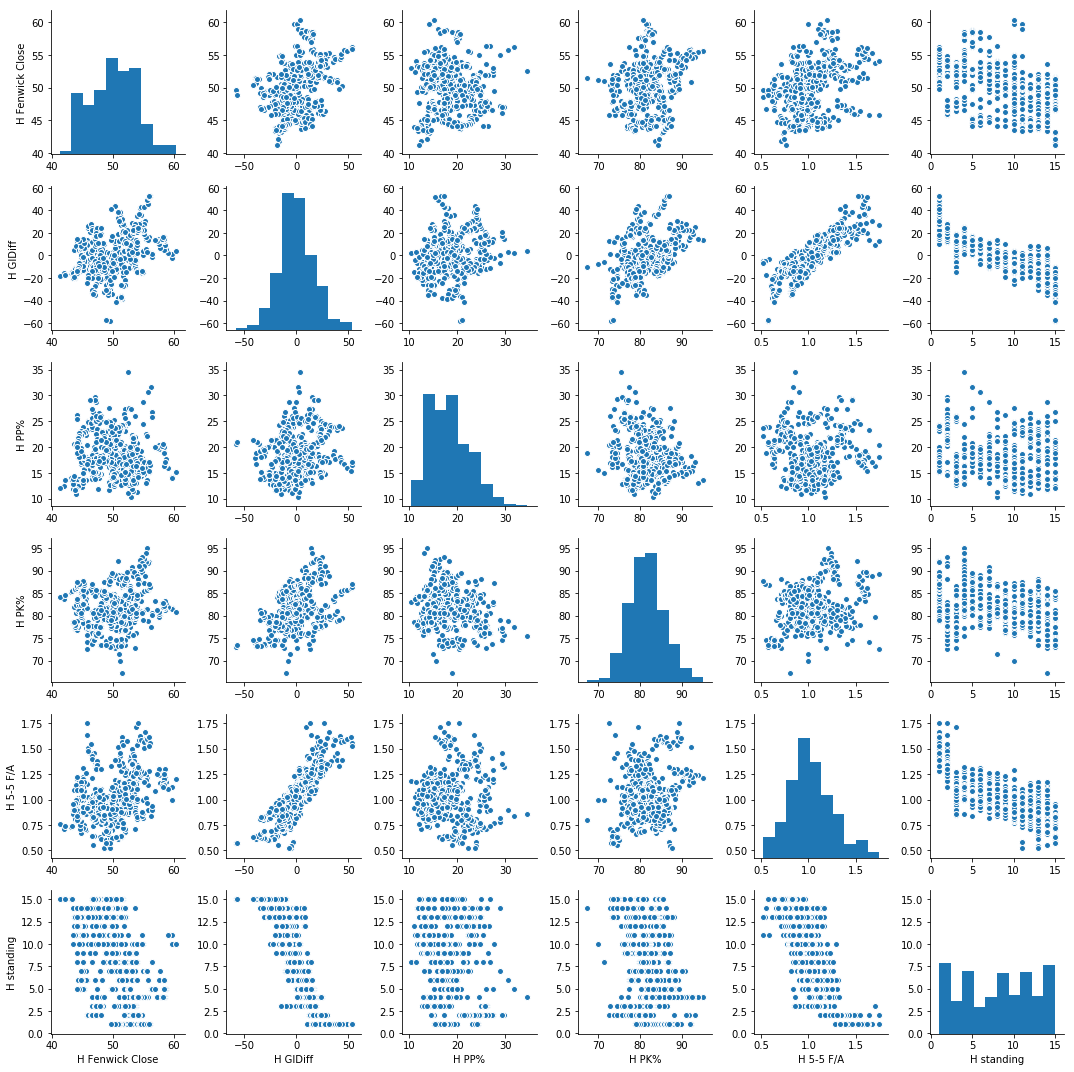

In [13]:
home_data = ['H Fenwick Close','H GlDiff','H PP%','H PK%','H 5-5 F/A','H standing']
graph_home = df[home_data]
sns.pairplot(data=graph_home)
plt.show()

The ones that stick out the most are GlDiff to 5-5 F/A looks positively correlated, GlDiff to standing looks negatively correlated, and 5-5 F/A to standing also looks negatively correlated.  No surprise really about the second one, a team that scores more than it is scored on should be better in the standings.  I do find it interesting that 5-5 F/A has apparently that much more impact on the standings than PP% or PK%, suggesting a team that does better when both teams are full strength should do better than one which does better in penalty situations.

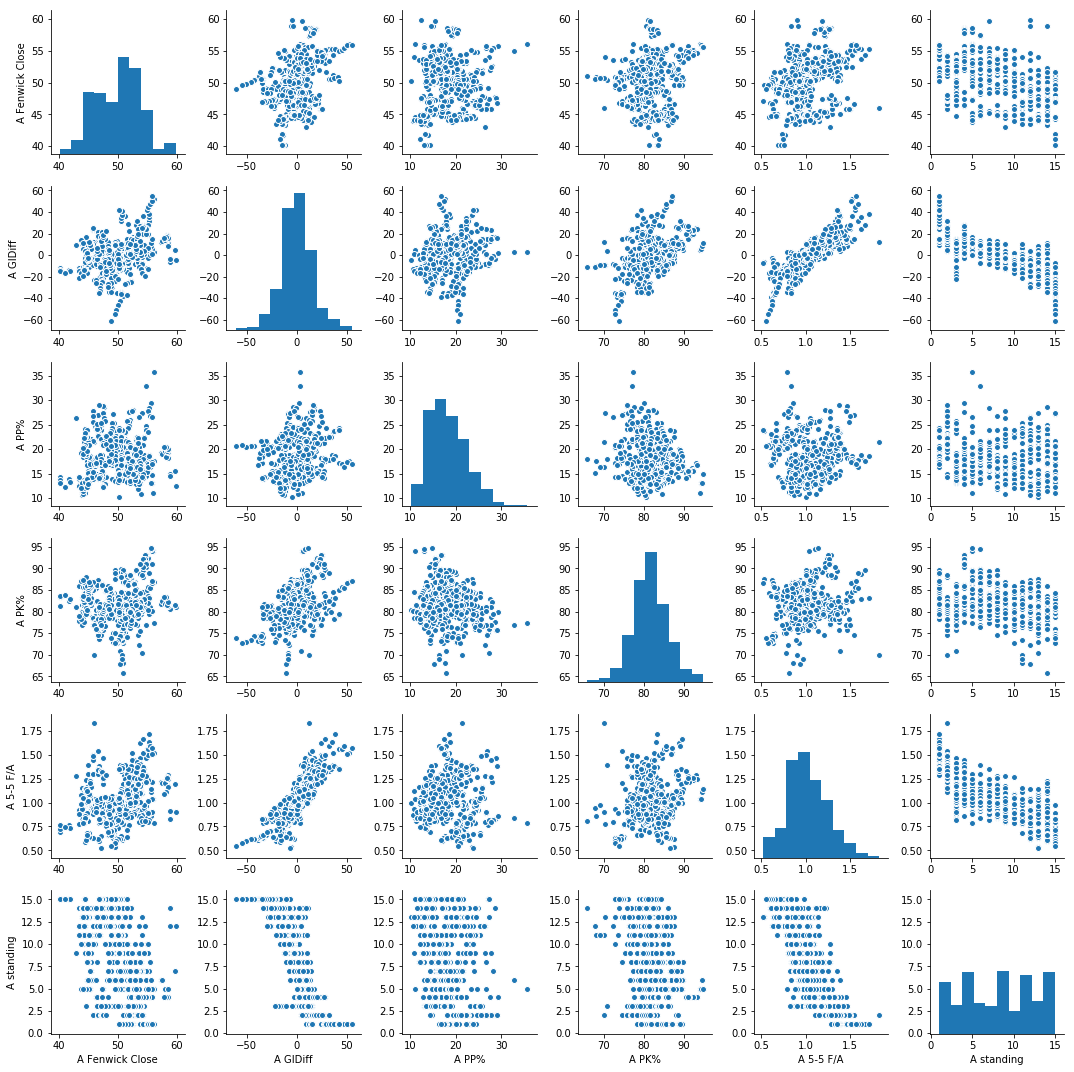

In [14]:
away_data = ['A Fenwick Close','A GlDiff','A PP%','A PK%','A 5-5 F/A','A standing']
graph_away = df[away_data]
sns.pairplot(data=graph_away)
plt.show()

Very similar results for away teams.  Let's see the stats I didn't think to be impactful.

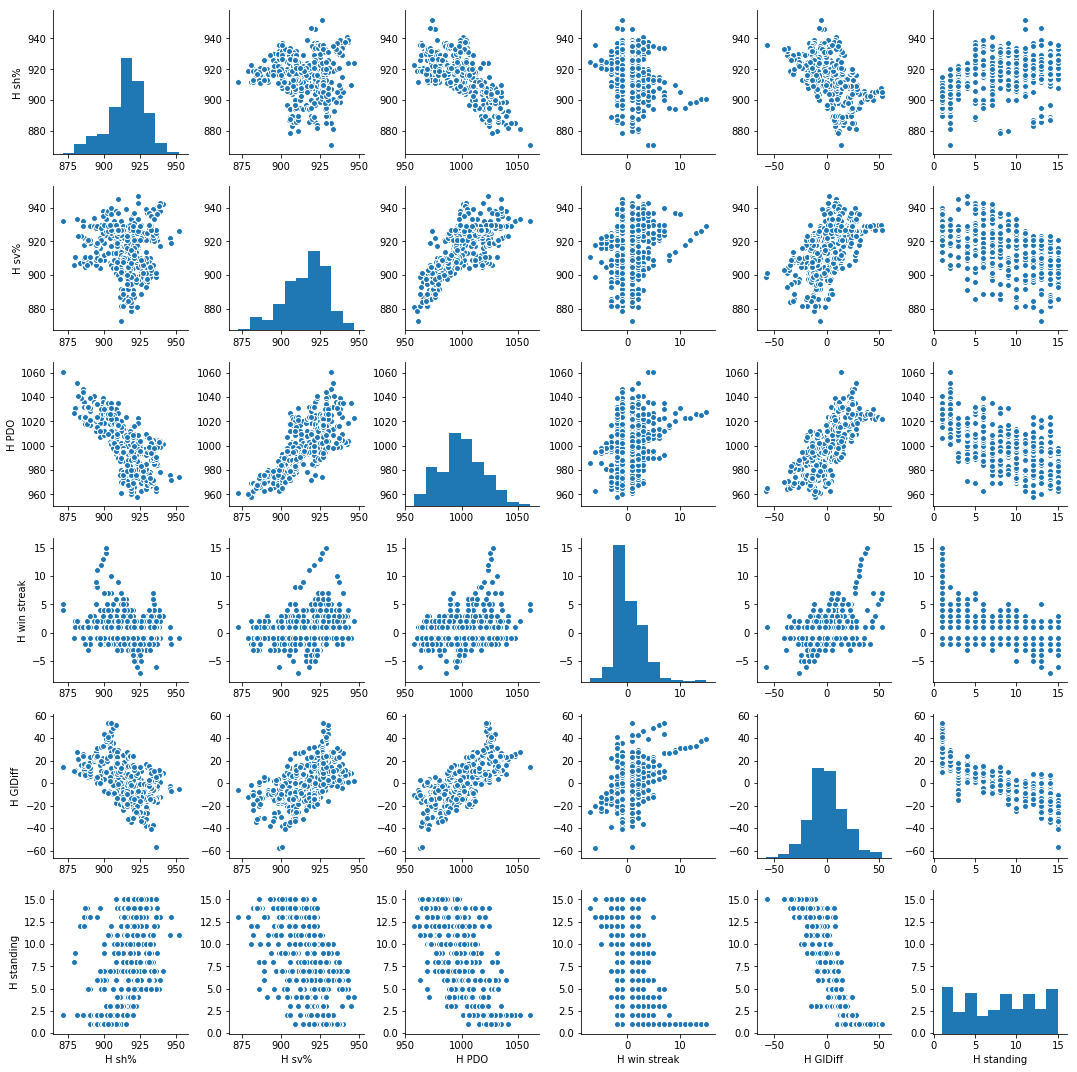

In [15]:
home_data_2 = ['H sh%','H sv%','H PDO','H win streak','H GlDiff','H standing']
graph_home_2 = df[home_data_2]
sns.pairplot(data=graph_home_2)
plt.show()

I left in GlDiff and standing because they looked to be the more important columns from the first scatter plot.  sh% and sv% seem strongly correlated to PDO, which they should be, but sh% should be positively correlated, not negatively.  I may have to look at that.  PDO does appear to have a positive correlation with GlDiff and a negative one with standing, so a "lucky" team scores more than it is scored on and tends to do better in the standing.

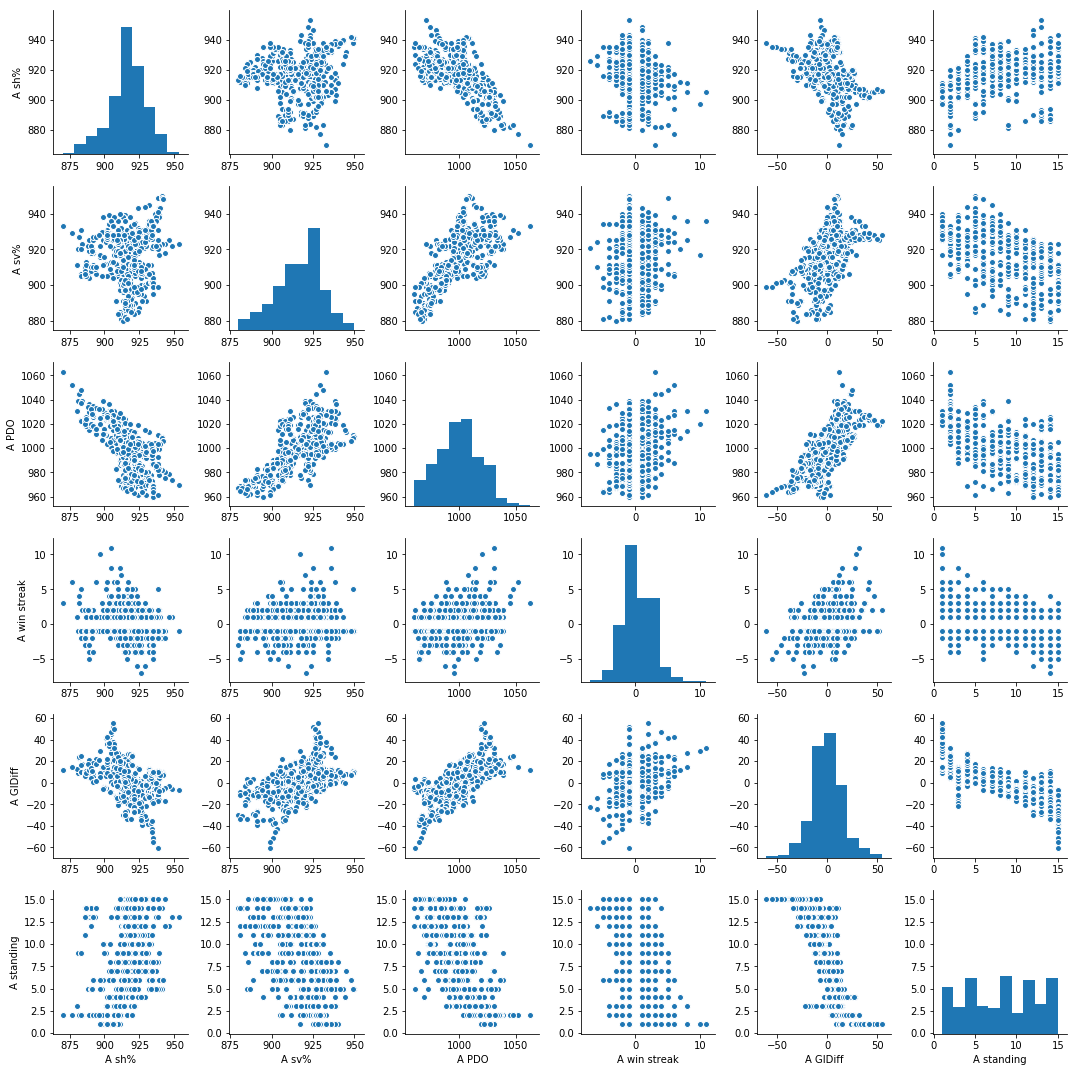

In [16]:
away_data_2 = ['A sh%','A sv%','A PDO','A win streak','A GlDiff','A standing']
graph_away_2 = df[away_data_2]
sns.pairplot(data=graph_away_2)
plt.show()

Again, similar results for away teams.  Let's see some cross scatter plots.

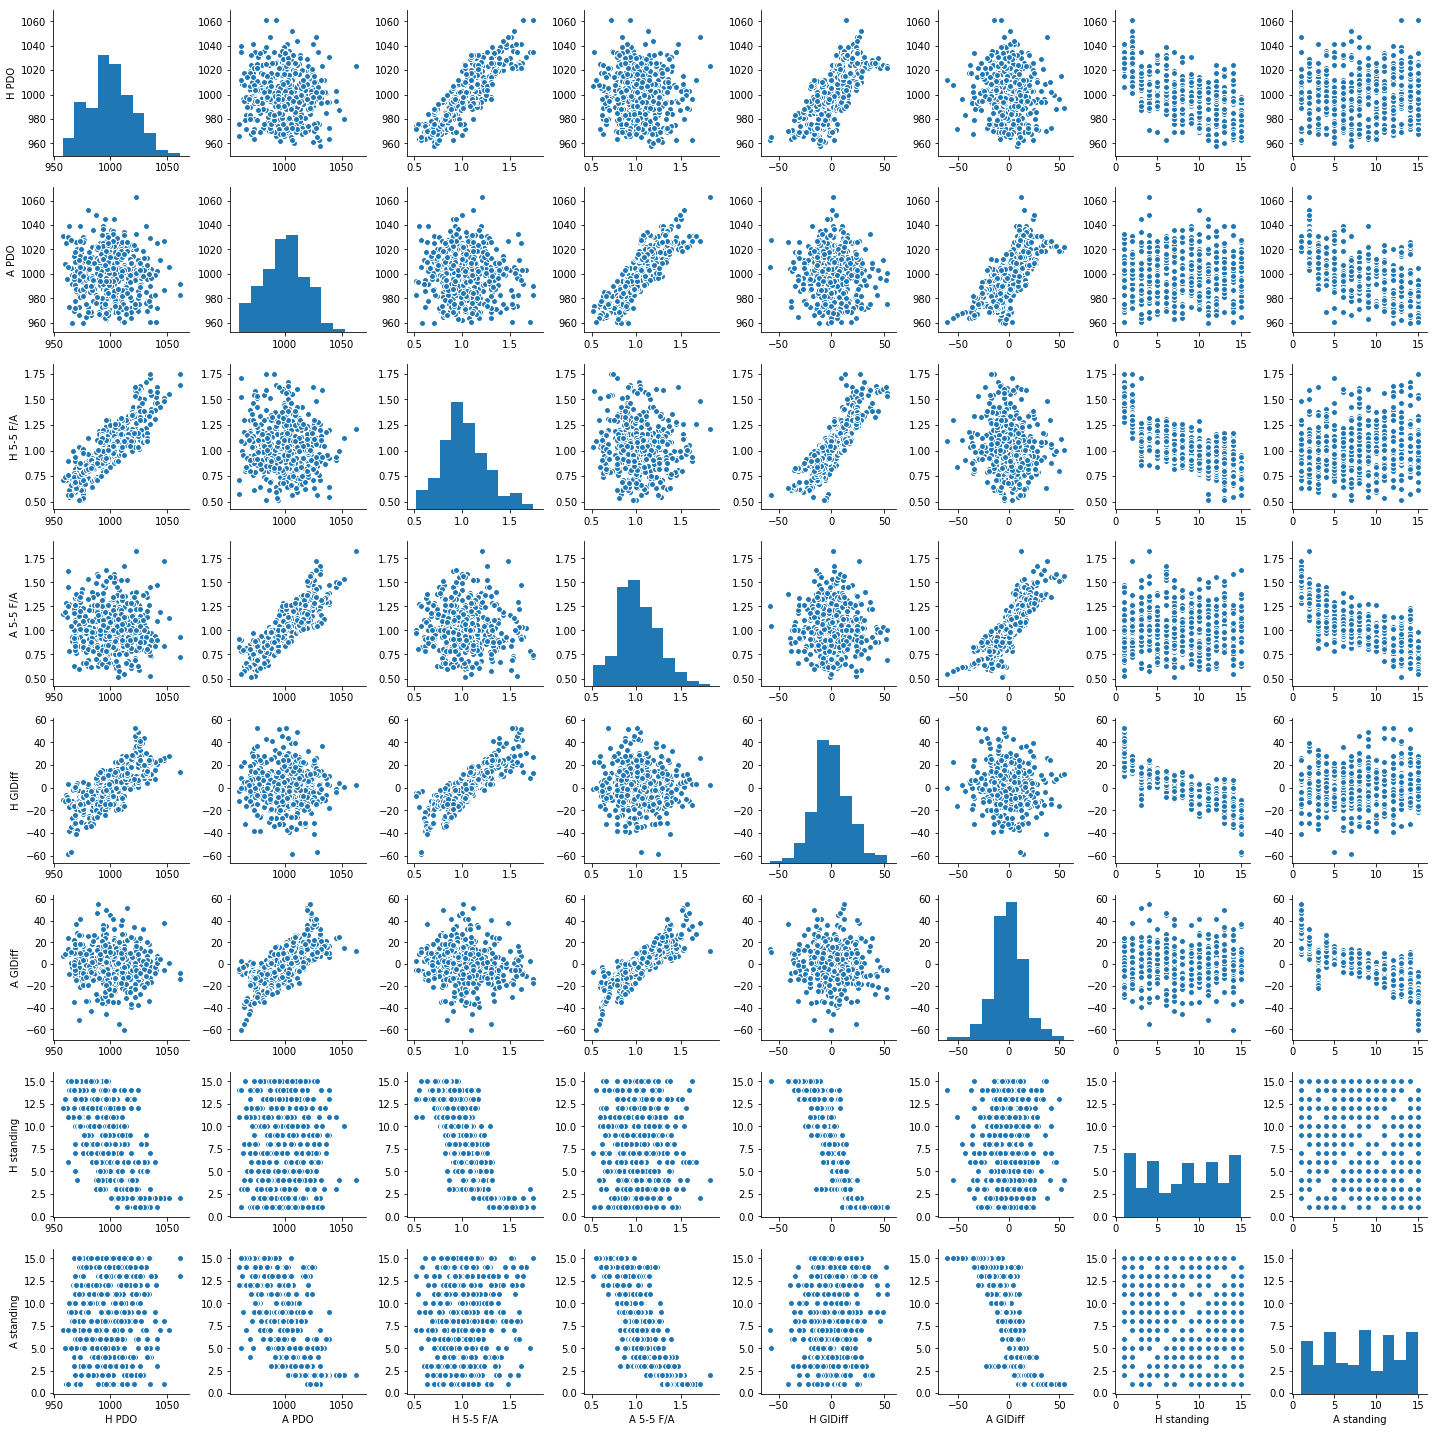

In [17]:
mix_data = ['H PDO','A PDO','H 5-5 F/A','A 5-5 F/A','H GlDiff','A GlDiff','H standing','A standing']
graph_mix = df[mix_data]
sns.pairplot(data=graph_mix)
plt.show()

I was hoping for some interesting correlations between the home and away data, but there doesn't really appear to be any.

However, there are some histograms that may be worth taking a closer look at.  Histograms show bars that show the amount of data at certain values.  Taller bars show bigger concentrations of data.

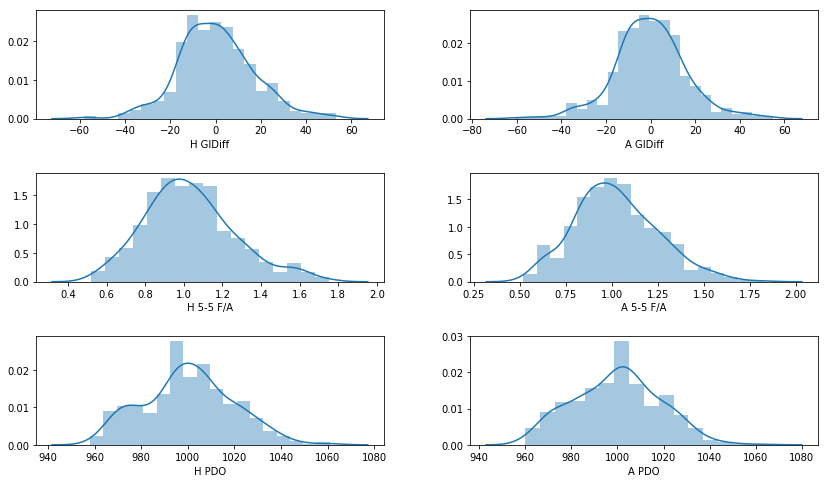

In [18]:
plt.subplots_adjust(hspace=0.5,wspace=0.25)
plt.subplot(3,2,1)
sns.distplot(df['H GlDiff'])
plt.subplot(3,2,2)
sns.distplot(df['A GlDiff'])
plt.subplot(3,2,3)
sns.distplot(df['H 5-5 F/A'])
plt.subplot(3,2,4)
sns.distplot(df['A 5-5 F/A'])
plt.subplot(3,2,5)
sns.distplot(df['H PDO'])
plt.subplot(3,2,6)
sns.distplot(df['A PDO'])
plt.rcParams['figure.figsize'] = (14,8)
plt.show()

The goal difference for home and away teams shows roughly the same slope on the negative side, but home teams have a more gradual slope on the positive side, suggesting home teams have slightly better goal differences.  The ratio of goals for versus goals against at full strength is similar, suggesting home teams have a slight advantage at full strength also.  However, the PDO plots show more variance.  Home teams have a peak PDO under 1000, while away teams have a peak PDO over 1000.  Since PDO is supposed to be a measure of luck, perhaps away teams win more by "luck" than home teams?

In [19]:
# Make sure to save the cleaned data set

df.to_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data_clean.csv')

In [20]:
# And make sure to update my NaN dataset also

df_with_na = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data_with_na.csv')
df_with_na.at[1,'Game'] = '2013-02-09 Pittsburgh at New Jersey'
df_with_na.at[16,'Game'] = '2013-02-10 New Jersey at Pittsburgh'
df_with_na.at[24,'Game'] = '2013-02-12 Carolina at New Jersey'
df_with_na.at[44,'Game'] = '2013-02-15 Philadelphia at New Jersey'
df_with_na.at[54,'Game'] = '2013-02-16 New Jersey at NY Islanders'
df_with_na.at[65,'Game'] = '2013-02-18 Ottawa at New Jersey'
df_with_na.at[85,'Game'] = '2013-02-21 New Jersey at Washington'
df_with_na.at[96,'Game'] = '2013-02-23 New Jersey at Washington'
df_with_na.at[109,'Game'] = '2013-02-24 Winnipeg at New Jersey'
df_with_na.at[139,'Game'] = '2013-02-28 New Jersey at Winnipeg'
df_with_na.at[150,'Game'] = '2013-03-02 New Jersey at Buffalo'
df_with_na.at[166,'Game'] = '2013-03-04 New Jersey at Toronto'
df_with_na.at[170,'Game'] = '2013-03-05 Tampa Bay at New Jersey'
df_with_na.at[186,'Game'] = '2013-03-07 Buffalo at New Jersey'
df_with_na.at[180,'A PP%'] = 28.3
df_with_na.at[180,'A PK%'] = 79.4
df_with_na.to_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 1/cp1_data_clean_with_na.csv')